Imports

In [11]:
import os
import time
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io

# from google.colab import files  <-- DELETE THIS
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, f1_score, confusion_matrix, classification_report,
    roc_curve, auc
)
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

print("All imports loaded successfully.")

All imports loaded successfully.


Load Dataset

In [12]:
# Load Dataset using the absolute path
import pandas as pd

# We use r"..." (raw string) to handle Windows backslashes correctly
dataset_path = r"C:\Users\BdCalling\Downloads\DSL-StrongPasswordData.csv"

try:
    df = pd.read_csv(dataset_path)
    print(f"Dataset loaded successfully from: {dataset_path}")
    print(f"Shape: {df.shape[0]} samples × {df.shape[1]} columns")
except FileNotFoundError:
    print(f"Error: Still cannot find file at: {dataset_path}")
    print("Please check that the file name matches exactly.")

Dataset loaded successfully from: C:\Users\BdCalling\Downloads\DSL-StrongPasswordData.csv
Shape: 20400 samples × 34 columns


Dataset Summary and Quality Check

In [14]:
print("Total Samples:", len(df))

print("\nDataset Columns:")
print(df.columns.tolist())

print("\nSummary Statistics:")
display(df.describe())

print("\nMissing Values Per Column:")
print(df.isnull().sum())

print("\nNumber of Users:")
print(df['subject'].nunique())

print("Dataset looks very well")

Total Samples: 20400

Dataset Columns:
['subject', 'sessionIndex', 'rep', 'H.period', 'DD.period.t', 'UD.period.t', 'H.t', 'DD.t.i', 'UD.t.i', 'H.i', 'DD.i.e', 'UD.i.e', 'H.e', 'DD.e.five', 'UD.e.five', 'H.five', 'DD.five.Shift.r', 'UD.five.Shift.r', 'H.Shift.r', 'DD.Shift.r.o', 'UD.Shift.r.o', 'H.o', 'DD.o.a', 'UD.o.a', 'H.a', 'DD.a.n', 'UD.a.n', 'H.n', 'DD.n.l', 'UD.n.l', 'H.l', 'DD.l.Return', 'UD.l.Return', 'H.Return']

Summary Statistics:


,sessionIndex,rep,H.period,DD.period.t,UD.period.t,H.t,DD.t.i,UD.t.i,H.i,DD.i.e,...,H.a,DD.a.n,UD.a.n,H.n,DD.n.l,UD.n.l,H.l,DD.l.Return,UD.l.Return,H.Return
count,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,...,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000
mean,4.500000,25.500000,0.093379,0.264148,0.170769,0.085727,0.169085,0.083358,0.081565,0.159372,...,0.106259,0.150670,0.044411,0.089899,0.202630,0.112731,0.095589,0.321847,0.226259,0.088306
std,2.291344,14.431223,0.029626,0.220534,0.226836,0.027424,0.123546,0.125755,0.026887,0.226928,...,0.038828,0.107422,0.105197,0.030738,0.150191,0.159571,0.028348,0.225389,0.230759,0.027452
min,1.000000,1.000000,0.001400,0.018700,-0.235800,0.009300,0.001100,-0.162100,0.003200,0.001400,...,0.004000,0.001100,-0.235500,0.003700,0.001300,-0.175800,0.003700,0.008300,-0.124500,0.002900
25%,2.750000,13.000000,0.074400,0.146900,0.049800,0.066000,0.113600,0.027200,0.062000,0.089300,...,0.082100,0.096100,-0.009000,0.067300,0.127600,0.023500,0.077400,0.210000,0.114100,0.069900
50%,4.500000,25.500000,0.089500,0.205950,0.108700,0.081000,0.140400,0.057800,0.077100,0.120900,...,0.101900,0.125000,0.022700,0.085300,0.172500,0.095500,0.093700,0.263000,0.160300,0.085500
75%,6.250000,38.000000,0.107900,0.306450,0.212400,0.099800,0.183900,0.096400,0.096900,0.173100,...,0.122300,0.174600,0.068900,0.107900,0.228800,0.145700,0.111100,0.350200,0.255100,0.103700
max,8.000000,50.000000,0.376100,12.506100,12.451700,0.241100,4.919700,4.799900,0.331200,25.987300,...,2.035300,3.327800,2.524200,0.357700,4.025200,3.978200,0.340700,5.883600,5.836400,0.265100



Missing Values Per Column:
subject            0
sessionIndex       0
rep                0
H.period           0
DD.period.t        0
UD.period.t        0
H.t                0
DD.t.i             0
UD.t.i             0
H.i                0
DD.i.e             0
UD.i.e             0
H.e                0
DD.e.five          0
UD.e.five          0
H.five             0
DD.five.Shift.r    0
UD.five.Shift.r    0
H.Shift.r          0
DD.Shift.r.o       0
UD.Shift.r.o       0
H.o                0
DD.o.a             0
UD.o.a             0
H.a                0
DD.a.n             0
UD.a.n             0
H.n                0
DD.n.l             0
UD.n.l             0
H.l                0
DD.l.Return        0
UD.l.Return        0
H.Return           0
dtype: int64

Number of Users:
51
Dataset looks very well


Class Distribution & Dataset Balance Check

Class Distribution (Samples per User):
subject
s002    400
s003    400
s004    400
s005    400
s007    400
s008    400
s010    400
s011    400
s012    400
s013    400
s015    400
s016    400
s017    400
s018    400
s019    400
s020    400
s021    400
s022    400
s024    400
s025    400
s026    400
s027    400
s028    400
s029    400
s030    400
s031    400
s032    400
s033    400
s034    400
s035    400
s036    400
s037    400
s038    400
s039    400
s040    400
s041    400
s042    400
s043    400
s044    400
s046    400
s047    400
s048    400
s049    400
s050    400
s051    400
s052    400
s053    400
s054    400
s055    400
s056    400
s057    400
Name: count, dtype: int64


C:\Users\BdCalling\AppData\Local\Temp\ipykernel_1052\1395478836.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")


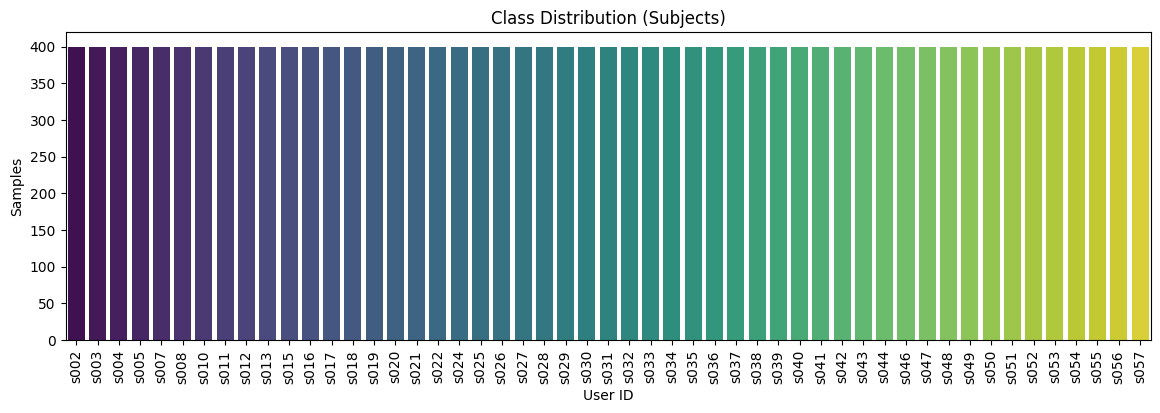

✔️ Dataset is balanced (ratio = 1.00)


In [15]:
print("Class Distribution (Samples per User):")
class_counts = df['subject'].value_counts()
print(class_counts)

plt.figure(figsize=(14,4))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")
plt.title("Class Distribution (Subjects)")
plt.xlabel("User ID")
plt.ylabel("Samples")
plt.xticks(rotation=90)
plt.show()

min_class = class_counts.min()
max_class = class_counts.max()
imbalance_ratio = max_class / min_class

if imbalance_ratio > 1.5:
    print(f"⚠️ Dataset appears imbalanced (ratio = {imbalance_ratio:.2f})")
else:
    print(f"✔️ Dataset is balanced (ratio = {imbalance_ratio:.2f})")


Feature Extraction

In [16]:

# 1. Identify numeric columns automatically
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
print("Numeric columns detected:")
print(numeric_cols)

# 2. Remove 'subject' because it is the user label, not a feature
if "subject" in numeric_cols:
    numeric_cols.remove("subject")

# 3. Final feature list extracted from the dataset
feature_cols = numeric_cols
print("\nFinal feature list (dataset-derived):")
print(feature_cols)

# Preview the extracted features
features_df = df[feature_cols].copy()
features_df.head()


Numeric columns detected:
['sessionIndex', 'rep', 'H.period', 'DD.period.t', 'UD.period.t', 'H.t', 'DD.t.i', 'UD.t.i', 'H.i', 'DD.i.e', 'UD.i.e', 'H.e', 'DD.e.five', 'UD.e.five', 'H.five', 'DD.five.Shift.r', 'UD.five.Shift.r', 'H.Shift.r', 'DD.Shift.r.o', 'UD.Shift.r.o', 'H.o', 'DD.o.a', 'UD.o.a', 'H.a', 'DD.a.n', 'UD.a.n', 'H.n', 'DD.n.l', 'UD.n.l', 'H.l', 'DD.l.Return', 'UD.l.Return', 'H.Return']

Final feature list (dataset-derived):
['sessionIndex', 'rep', 'H.period', 'DD.period.t', 'UD.period.t', 'H.t', 'DD.t.i', 'UD.t.i', 'H.i', 'DD.i.e', 'UD.i.e', 'H.e', 'DD.e.five', 'UD.e.five', 'H.five', 'DD.five.Shift.r', 'UD.five.Shift.r', 'H.Shift.r', 'DD.Shift.r.o', 'UD.Shift.r.o', 'H.o', 'DD.o.a', 'UD.o.a', 'H.a', 'DD.a.n', 'UD.a.n', 'H.n', 'DD.n.l', 'UD.n.l', 'H.l', 'DD.l.Return', 'UD.l.Return', 'H.Return']


,sessionIndex,rep,H.period,DD.period.t,UD.period.t,H.t,DD.t.i,UD.t.i,H.i,DD.i.e,...,H.a,DD.a.n,UD.a.n,H.n,DD.n.l,UD.n.l,H.l,DD.l.Return,UD.l.Return,H.Return
0,1,1,0.1491,0.3979,0.2488,0.1069,0.1674,0.0605,0.1169,0.2212,...,0.1349,0.1484,0.0135,0.0932,0.3515,0.2583,0.1338,0.3509,0.2171,0.0742
1,1,2,0.1111,0.3451,0.2340,0.0694,0.1283,0.0589,0.0908,0.1357,...,0.1412,0.2558,0.1146,0.1146,0.2642,0.1496,0.0839,0.2756,0.1917,0.0747
2,1,3,0.1328,0.2072,0.0744,0.0731,0.1291,0.0560,0.0821,0.1542,...,0.1621,0.2332,0.0711,0.1172,0.2705,0.1533,0.1085,0.2847,0.1762,0.0945
3,1,4,0.1291,0.2515,0.1224,0.1059,0.2495,0.1436,0.1040,0.2038,...,0.1457,0.1629,0.0172,0.0866,0.2341,0.1475,0.0845,0.3232,0.2387,0.0813
4,1,5,0.1249,0.2317,0.1068,0.0895,0.1676,0.0781,0.0903,0.1589,...,0.1312,0.1582,0.0270,0.0884,0.2517,0.1633,0.0903,0.2517,0.1614,0.0818


CORRELATION HEATMAP

Generating correlation heatmap...


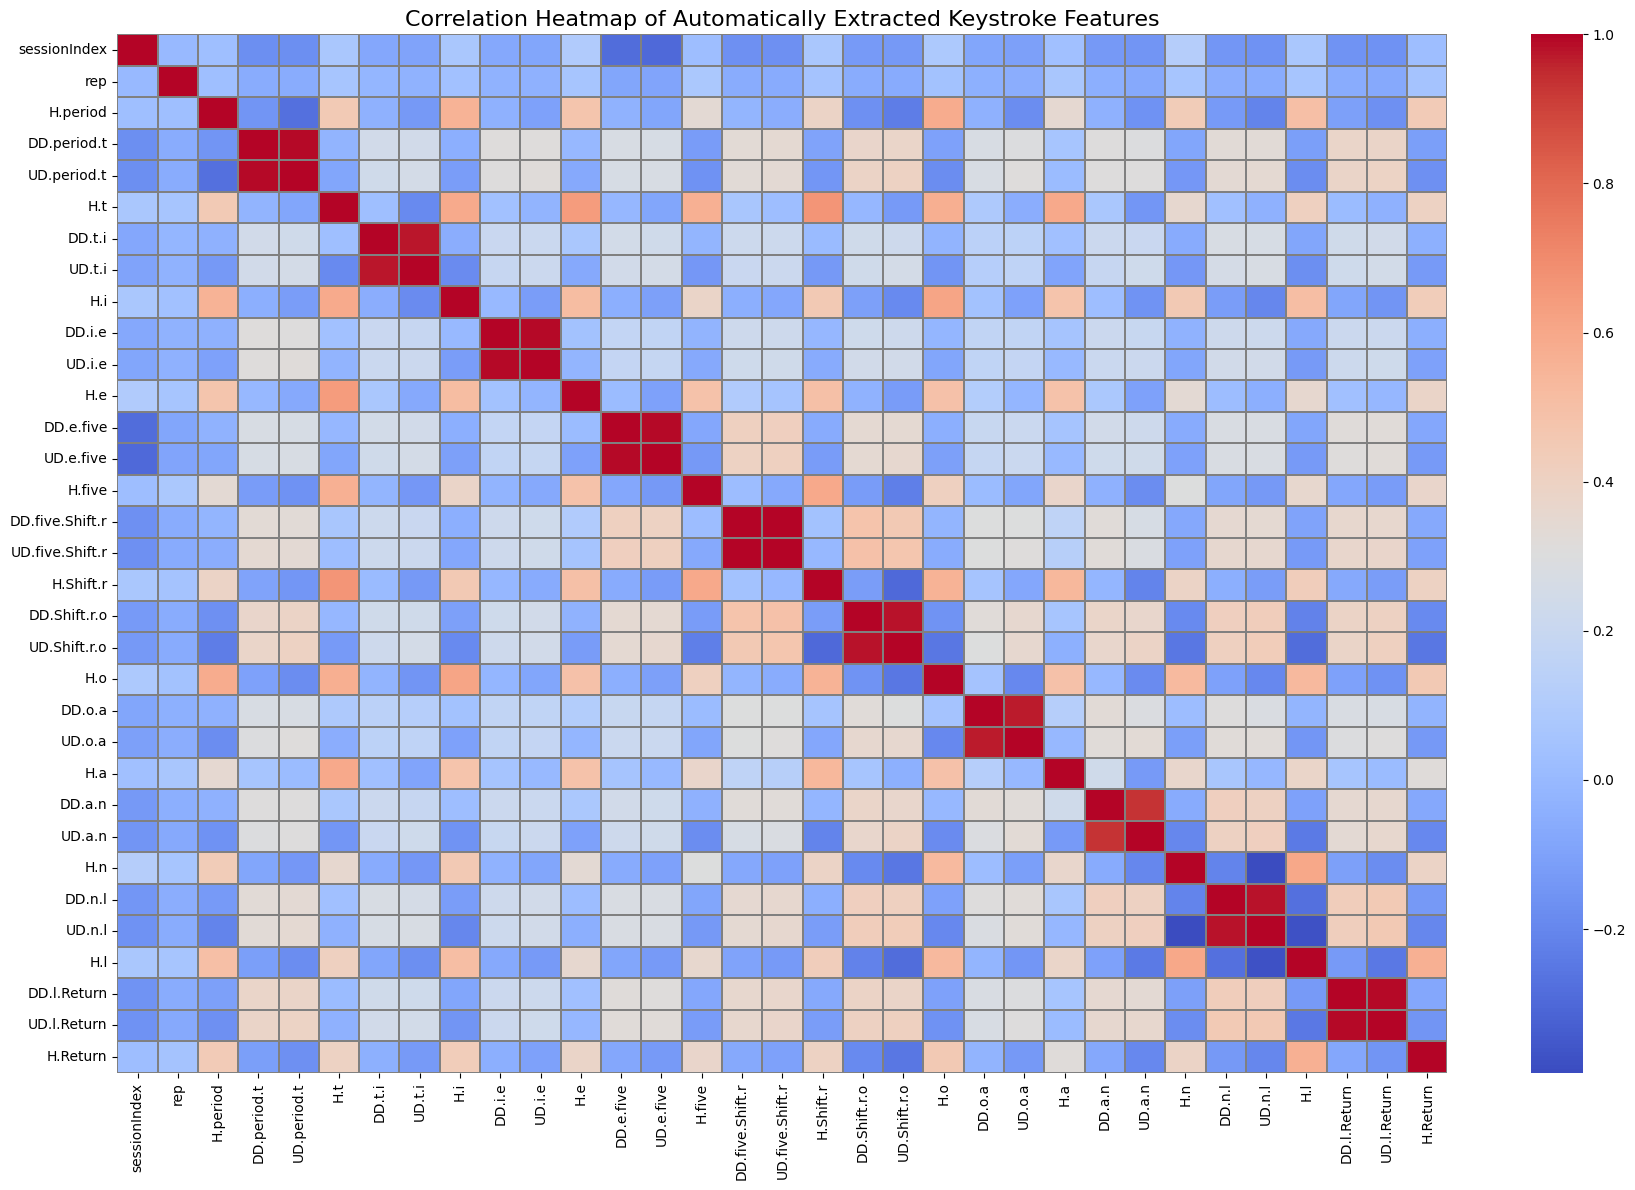

In [17]:
print("Generating correlation heatmap...")

# Compute correlation matrix
corr_matrix = features_df.corr()

# Plot heatmap
plt.figure(figsize=(18, 12))
sns.heatmap(
    corr_matrix,
    cmap="coolwarm",
    annot=False,
    linewidths=0.2,
    linecolor='gray'
)

plt.title("Correlation Heatmap of Automatically Extracted Keystroke Features", fontsize=16)
plt.tight_layout()
plt.show()


Initializing Authentication Model Training

In [18]:
print("Starting bioauthentication model training...")

# Get list of all users
users = df['subject'].unique()
print(f"Detected {len(users)} users:", users)

# Table to store results
results = []

# Create directory for user models
os.makedirs("/content/models", exist_ok=True)
print("Model directory created at /content/models")


Starting bioauthentication model training...
Detected 51 users: ['s002' 's003' 's004' 's005' 's007' 's008' 's010' 's011' 's012' 's013'
 's015' 's016' 's017' 's018' 's019' 's020' 's021' 's022' 's024' 's025'
 's026' 's027' 's028' 's029' 's030' 's031' 's032' 's033' 's034' 's035'
 's036' 's037' 's038' 's039' 's040' 's041' 's042' 's043' 's044' 's046'
 's047' 's048' 's049' 's050' 's051' 's052' 's053' 's054' 's055' 's056'
 's057']
Model directory created at /content/models


Per-User Authentication Model Training

In [19]:
for user in users:

    print("\n---------------------------------------------------")
    print(f"Training model for USER: {user}")
    print("---------------------------------------------------")

    # 1. Genuine samples for this user
    genuine = df[df['subject'] == user].copy()
    genuine['label'] = 1   # genuine attempts

    # 2. Impostor samples (all other users)
    impostor = df[df['subject'] != user].copy()
    impostor['label'] = 0  # impostor attempts

    # 3. Combine genuine and impostor samples
    data = pd.concat([genuine, impostor], ignore_index=True)

    # 4. Extract feature matrix and target labels
    X = data[feature_cols]
    y = data['label']

    # 5. Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.30, shuffle=True, random_state=42
    )



---------------------------------------------------
Training model for USER: s002
---------------------------------------------------

---------------------------------------------------
Training model for USER: s003
---------------------------------------------------

---------------------------------------------------
Training model for USER: s004
---------------------------------------------------

---------------------------------------------------
Training model for USER: s005
---------------------------------------------------

---------------------------------------------------
Training model for USER: s007
---------------------------------------------------

---------------------------------------------------
Training model for USER: s008
---------------------------------------------------

---------------------------------------------------
Training model for USER: s010
---------------------------------------------------

---------------------------------------------------
Tr

Multi-Algorithm Per-User Authentication Training

In [20]:
print("🔐 Starting multi-algorithm authentication training...")

users = df['subject'].unique()
print(f"Detected {len(users)} users.")

# Create output folders
os.makedirs("/content/models", exist_ok=True)
os.makedirs("/content/best_models", exist_ok=True)

# Master results list
all_results = []


# Define all algorithms


models_dict = {
    "RandomForest"       : RandomForestClassifier(n_estimators=300, max_depth=25, random_state=42),
    "DecisionTree"       : DecisionTreeClassifier(max_depth=20),
    "GradientBoosting"   : GradientBoostingClassifier(),
    "SVM"                : SVC(kernel='rbf', probability=True),
    "KNN"                : KNeighborsClassifier(n_neighbors=5)
}


#  TRAIN ALL MODELS FOR EACH USER


for user in users:

    print("\n=====================================================")
    print(f" Training models for USER: {user}")
    print("=====================================================")

    # Genuine samples
    genuine = df[df['subject'] == user].copy()
    genuine["label"] = 1

    # Impostor samples
    impostor = df[df['subject'] != user].copy()
    impostor["label"] = 0

    # Combine
    data = pd.concat([genuine, impostor], ignore_index=True)

    X = data[feature_cols]
    y = data["label"]

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, shuffle=True, random_state=42
    )

    # Track best model
    best_acc = -1
    best_model_name = None
    best_model = None


    # Train every algorithm


    for model_name, model_obj in models_dict.items():
        print(f"\n➡ Training {model_name}...")

        # Train
        model_obj.fit(X_train, y_train)

        # Predict
        y_pred = model_obj.predict(X_test)

        # Metrics
        accuracy = accuracy_score(y_test, y_pred)
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

        FAR = fp / (fp + tn)   # impostor accepted
        FRR = fn / (fn + tp)   # genuine rejected

        print(f"   - Accuracy: {accuracy:.4f}")
        print(f"   - FAR: {FAR:.4f}")
        print(f"   - FRR: {FRR:.4f}")

        # Save model for this user/algorithm
        model_path = f"/content/models/{user}_{model_name}.pkl"
        joblib.dump(model_obj, model_path)

        # Add to comparison table
        all_results.append([user, model_name, accuracy, FAR, FRR])

        # Track best model
        if accuracy > best_acc:
            best_acc = accuracy
            best_model_name = model_name
            best_model = model_obj


    # ⭐ SAVE BEST MODEL PER USER


    best_path = f"/content/best_models/{user}_BEST_{best_model_name}.pkl"
    joblib.dump(best_model, best_path)

    print(f"\n🏆 Best model for {user}: {best_model_name} (Acc: {best_acc:.4f})")
    print(f" Saved best model to: {best_path}")



# 📄 SAVE ALL RESULTS TO CSV


results_df = pd.DataFrame(
    all_results,
    columns=["User", "Model", "Accuracy", "FAR", "FRR"]
)

results_df.to_csv("ALL_Auth_Model_Comparison.csv", index=False)
print("\n Full comparison saved to ALL_Auth_Model_Comparison.csv")

results_df


🔐 Starting multi-algorithm authentication training...
Detected 51 users.

 Training models for USER: s002

➡ Training RandomForest...
   - Accuracy: 0.9871
   - FAR: 0.0000
   - FRR: 0.6810

➡ Training DecisionTree...
   - Accuracy: 0.9802
   - FAR: 0.0127
   - FRR: 0.3879

➡ Training GradientBoosting...
   - Accuracy: 0.9912
   - FAR: 0.0012
   - FRR: 0.4052

➡ Training SVM...
   - Accuracy: 0.9810
   - FAR: 0.0000
   - FRR: 1.0000

➡ Training KNN...
   - Accuracy: 0.9810
   - FAR: 0.0000
   - FRR: 1.0000

🏆 Best model for s002: GradientBoosting (Acc: 0.9912)
 Saved best model to: /content/best_models/s002_BEST_GradientBoosting.pkl

 Training models for USER: s003

➡ Training RandomForest...
   - Accuracy: 0.9946
   - FAR: 0.0000
   - FRR: 0.2845

➡ Training DecisionTree...
   - Accuracy: 0.9884
   - FAR: 0.0077
   - FRR: 0.2155

➡ Training GradientBoosting...
   - Accuracy: 0.9964
   - FAR: 0.0007
   - FRR: 0.1552

➡ Training SVM...
   - Accuracy: 0.9810
   - FAR: 0.0000
   - FRR: 1.

,User,Model,Accuracy,FAR,FRR
0,s002,RandomForest,0.987092,0.000000,0.681034
1,s002,DecisionTree,0.980229,0.012658,0.387931
2,s002,GradientBoosting,0.991176,0.001166,0.405172
3,s002,SVM,0.981046,0.000000,1.000000
4,s002,KNN,0.981046,0.000000,1.000000
...,...,...,...,...,...
250,s057,RandomForest,0.989379,0.000000,0.560345
251,s057,DecisionTree,0.987582,0.005996,0.344828
252,s057,GradientBoosting,0.993137,0.000500,0.336207
253,s057,SVM,0.981046,0.000000,1.000000


Load Results

In [21]:


# Load the results from your training block
results_df = pd.read_csv("ALL_Auth_Model_Comparison.csv")
results_df.head()


,User,Model,Accuracy,FAR,FRR
0,s002,RandomForest,0.987092,0.000000,0.681034
1,s002,DecisionTree,0.980229,0.012658,0.387931
2,s002,GradientBoosting,0.991176,0.001166,0.405172
3,s002,SVM,0.981046,0.000000,1.000000
4,s002,KNN,0.981046,0.000000,1.000000


Accuracy Comparison for All Algorithms

C:\Users\BdCalling\AppData\Local\Temp\ipykernel_1052\3449436082.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x="Model", y="Accuracy", palette="viridis")


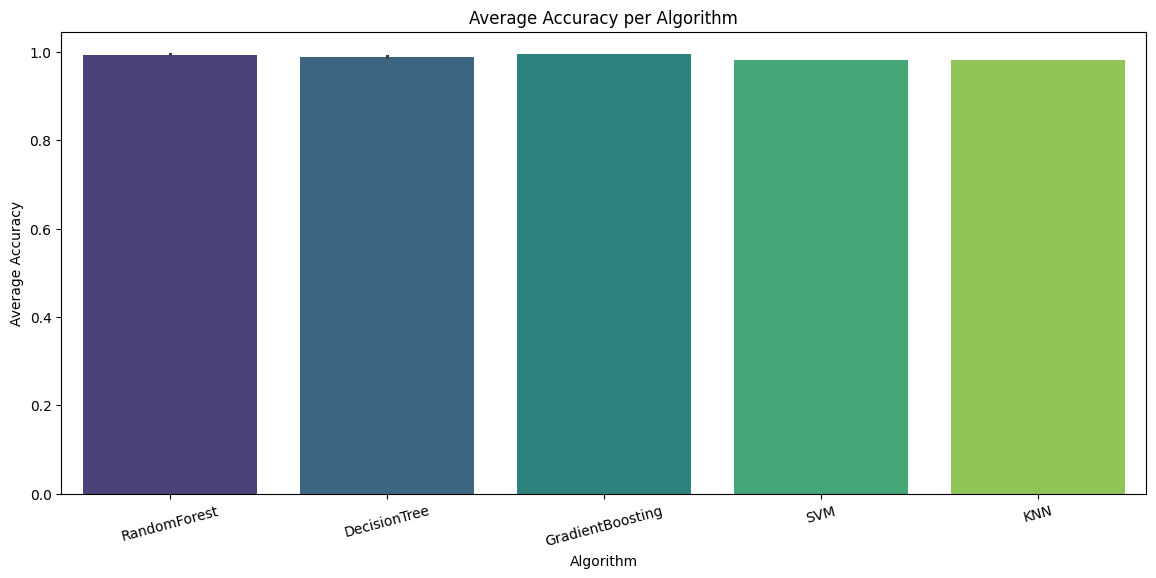

In [22]:
plt.figure(figsize=(14,6))
sns.barplot(data=results_df, x="Model", y="Accuracy", palette="viridis")
plt.title("Average Accuracy per Algorithm")
plt.ylabel("Average Accuracy")
plt.xlabel("Algorithm")
plt.xticks(rotation=15)
plt.show()


FAR Comparison (False Accept Rate)

C:\Users\BdCalling\AppData\Local\Temp\ipykernel_1052\860194911.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x="Model", y="FAR", palette="magma")


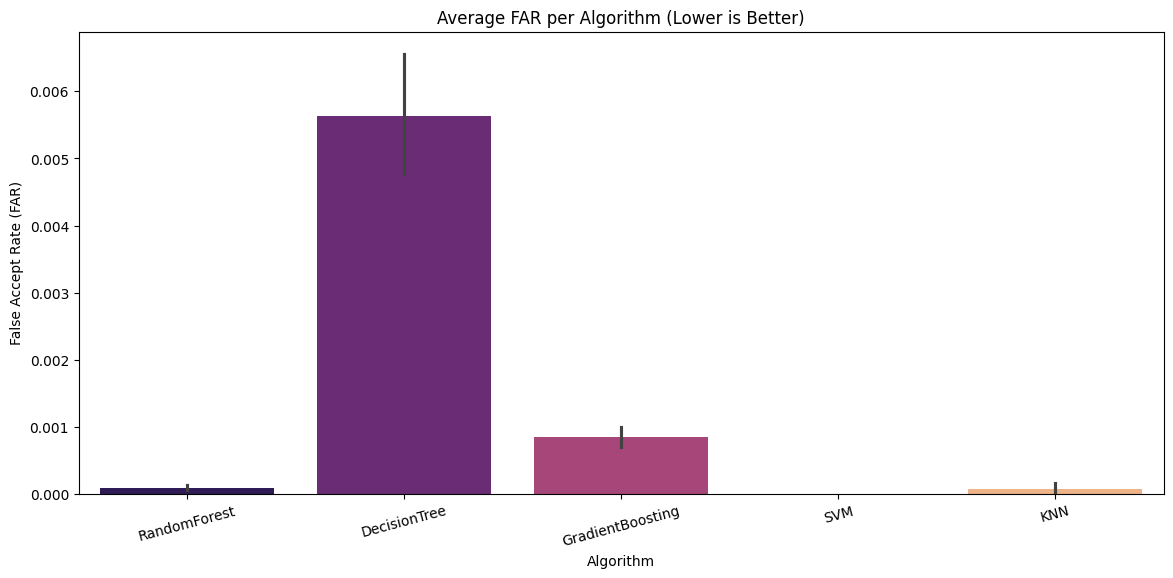

In [23]:
plt.figure(figsize=(14,6))
sns.barplot(data=results_df, x="Model", y="FAR", palette="magma")
plt.title("Average FAR per Algorithm (Lower is Better)")
plt.ylabel("False Accept Rate (FAR)")
plt.xlabel("Algorithm")
plt.xticks(rotation=15)
plt.show()


FRR Comparison (False Reject Rate)

C:\Users\BdCalling\AppData\Local\Temp\ipykernel_1052\3439875718.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x="Model", y="FRR", palette="coolwarm")


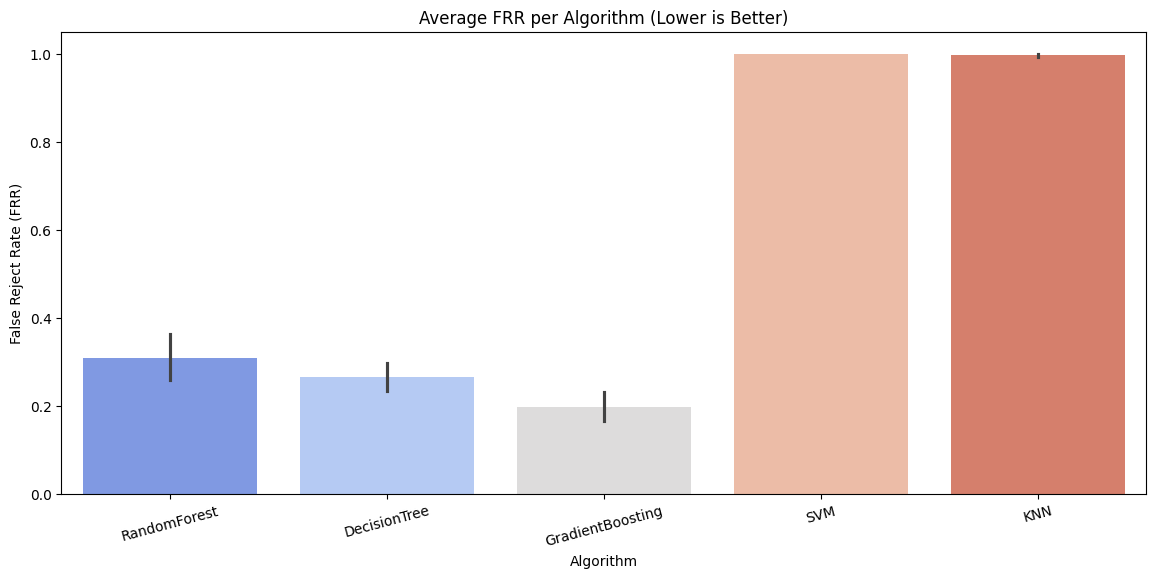

In [24]:
plt.figure(figsize=(14,6))
sns.barplot(data=results_df, x="Model", y="FRR", palette="coolwarm")
plt.title("Average FRR per Algorithm (Lower is Better)")
plt.ylabel("False Reject Rate (FRR)")
plt.xlabel("Algorithm")
plt.xticks(rotation=15)
plt.show()


(Which Algorithm Wins Most Often?)

C:\Users\BdCalling\AppData\Local\Temp\ipykernel_1052\890494123.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=best_models, x="Model", palette="Set2")


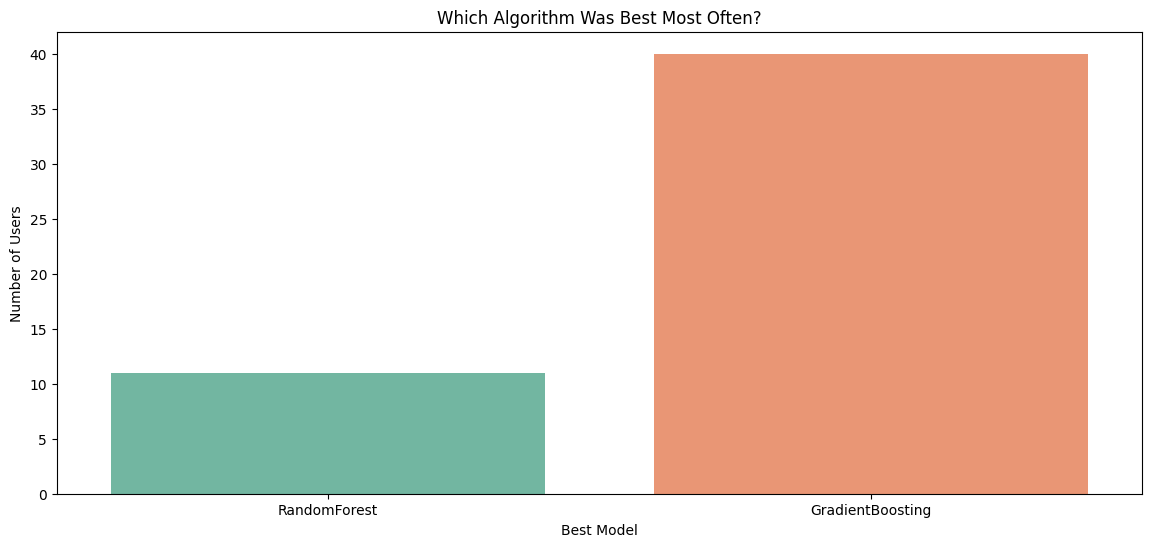

In [25]:
best_models = results_df.sort_values("Accuracy", ascending=False).groupby("User").head(1)

plt.figure(figsize=(14,6))
sns.countplot(data=best_models, x="Model", palette="Set2")
plt.title("Which Algorithm Was Best Most Often?")
plt.xlabel("Best Model")
plt.ylabel("Number of Users")
plt.show()


Full Performance Summary Table


   FULL PERFORMANCE SUMMARY (Averaged across 51 Users)


,Model,Accuracy,FAR,FRR
0,GradientBoosting,99.55%,0.0839%,19.62%
1,RandomForest,99.41%,0.0088%,30.75%
2,DecisionTree,98.94%,0.5630%,26.64%
3,SVM,98.10%,0.0000%,100.00%
4,KNN,98.10%,0.0065%,99.68%


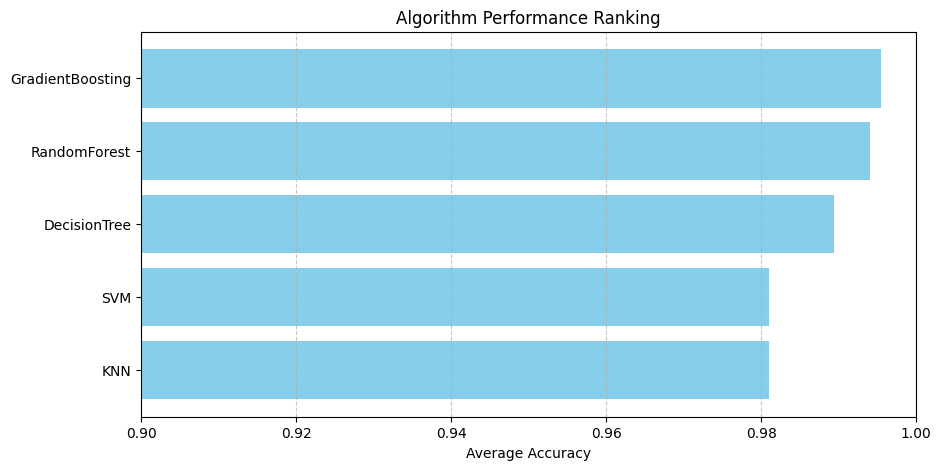


🏆 RECOMMENDATION: The GradientBoosting algorithm performed best overall
with an average accuracy of 99.55% and a False Accept Rate of 0.0839%.


In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Check if results_df exists, otherwise try to load it
if 'results_df' not in locals():
    try:
        results_df = pd.read_csv("ALL_Auth_Model_Comparison.csv")
        print("Loaded results from CSV.")
    except FileNotFoundError:
        print("Error: Results data not found. Please run the training block first.")
        results_df = pd.DataFrame() # Empty to prevent crashing

if not results_df.empty:
    # 2. Calculate Averages per Algorithm
    # We group by 'Model' and take the mean of the numeric columns
    summary_table = results_df.groupby("Model")[["Accuracy", "FAR", "FRR"]].mean().reset_index()

    # 3. Sort by Accuracy (High to Low)
    summary_table = summary_table.sort_values(by="Accuracy", ascending=False).reset_index(drop=True)

    # 4. Formatting for display (Convert decimals to percentages)
    display_table = summary_table.copy()
    display_table["Accuracy"] = display_table["Accuracy"].apply(lambda x: f"{x*100:.2f}%")
    display_table["FAR"] = display_table["FAR"].apply(lambda x: f"{x*100:.4f}%") # FAR is usually small, so 4 decimals
    display_table["FRR"] = display_table["FRR"].apply(lambda x: f"{x*100:.2f}%")

    # 5. Display the Summary
    print("\n=======================================================")
    print("   FULL PERFORMANCE SUMMARY (Averaged across 51 Users)")
    print("=======================================================")
    display(display_table)

    # 6. Optional: Visualizing the Summary
    # Create a simple bar chart comparing average accuracy
    plt.figure(figsize=(10, 5))
    plt.barh(summary_table["Model"], summary_table["Accuracy"], color='skyblue')
    plt.xlabel("Average Accuracy")
    plt.title("Algorithm Performance Ranking")
    plt.gca().invert_yaxis() # Best model at top
    plt.xlim(0.90, 1.0) # Zoom in on the high 90s range to see differences
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()

    # 7. Recommendation
    best_model = summary_table.iloc[0]
    print(f"\n🏆 RECOMMENDATION: The {best_model['Model']} algorithm performed best overall")
    print(f"with an average accuracy of {best_model['Accuracy']:.2%} and a False Accept Rate of {best_model['FAR']:.4%}.")